# Physics of Cosmic Structures: week 6 exercises
## Physics of the CMB

### I. CMB Parameter Sensitivity
The Standard Cosmological Model is defined by the values of six parameters:
* `As`: the amplitude of primordial scalar fluctuations;
* `ns`: the spectral index of primordial scalar fluctuations;
* `tau`: the optical depth to reionization;
* `H0`: the present-day value of the Hubble constant in units of km/s/Mpc;
* `ombh2`: the physical density of baryons multiplied by the square of the Hubble constant, denoted as $\Omega_b h^2$;
* `omch2`: the physical density of cold dark matter (CDM) multiplied by the square of the Hubble constant, denoted as $\Omega_c h^2$.

In [99]:
import sys,platform,os

import matplotlib
from matplotlib import pyplot as plt
import numpy as np

_camb_path = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('.'))), 'CAMB')
sys.path.insert(0,_camb_path)

import camb
print('Using CAMB %s installed at %s' %(camb.__version__,os.path.dirname(camb.__file__)))

from camb.symbolic import *

Using CAMB 1.5.4 installed at /Users/marigalla/AstroCosmoComputational/Students/MariaLuisaGallavotti/CAMB/camb


In [100]:
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

results = camb.get_results(pars)

## CMB Power Spectrum

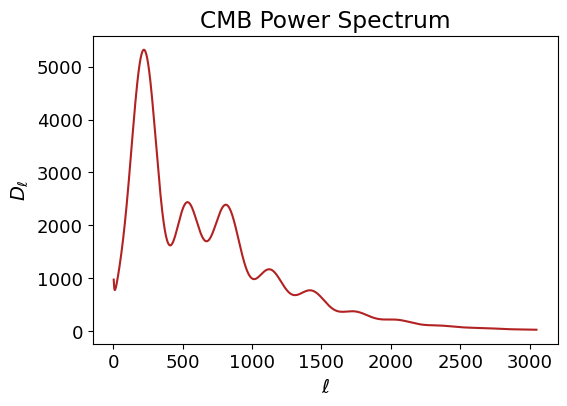

In [101]:
powers=results.get_cmb_power_spectra(pars,CMB_unit='muK')
totCL=powers['total']
ls=np.arange(totCL.shape[0])
plt.figure(figsize=(6,4))
plt.plot(ls[2:], totCL[2:,0], color='firebrick', label='total')
plt.title('CMB Power Spectrum')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$')
plt.show()

## Monopole, Dipole and Early/Late ISW Contributions

In [102]:
#source functions
monopole_source, ISW, doppler, quadrupole_source = get_scalar_temperature_sources()

from matplotlib import rcParams
rcParams.update( {'axes.labelsize': 14,
              'font.size': 14,
              'legend.fontsize': 14,
              'xtick.labelsize': 13,
              'ytick.labelsize': 13})
cl_label= r'$\ell(\ell+1)C_\ell/2\pi\quad [\mu {\rm K}^2]$'

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift>30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source], 
        source_names =names)

data= camb.get_results(pars)
dic = data.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

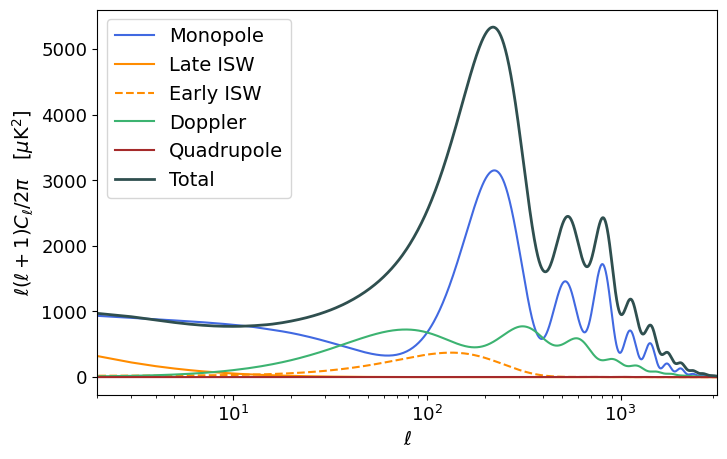

In [111]:
#plot
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(8,5))
plt.semilogx(ls,dic['monxmon'], color='royalblue')
plt.semilogx(ls,dic['LISWxLISW'], color='darkorange')
plt.semilogx(ls,dic['eISWxeISW'], ls='--', color='darkorange')
plt.semilogx(ls,dic['dopxdop'],color='mediumseagreen')
plt.semilogx(ls,dic['QxQ'], color='brown')
plt.semilogx(ls,dic['TxT'], lw=2, color='darkslategray')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');

### Components of the CMB Power Spectrum

* **Monopole**: it represents the uniform background temperature of the CMB across the entire sky ($\simeq 2.725 K$ today).

* **Dipole**: it arises due to the Doppler effect caused by the motion of the Earth relative to the rest frame of the CMB.

* **Early ISW (Integrated Sachs-Wolfe)**: it refers to the contribution to the CMB temperature anisotropies from the epoch of recombination until the present time. This effect arises from the gravitational potential wells and hills that CMB photons encounter on their way from the last scattering surface to us, and it primarily affects the largest angular scales in the CMB power spectrum.

* **Late ISW (Integrated Sachs-Wolfe)**: it refers to additional contributions to the CMB temperature anisotropies from more recent times, such as the era of dark energy domination. It occurs due to the time evolution of large-scale structures (such as clusters of galaxies) which induce changes in the gravitational potential wells that the CMB photons pass through. The late ISW effect typically affects smaller scales in the CMB power spectrum.

* **Quadrupole**: it represents temperature anisotropies in the CMB that vary on larger angular scales compared to the dipole.

## Variation of the Parameters

### $A_S$

(2, 3150)

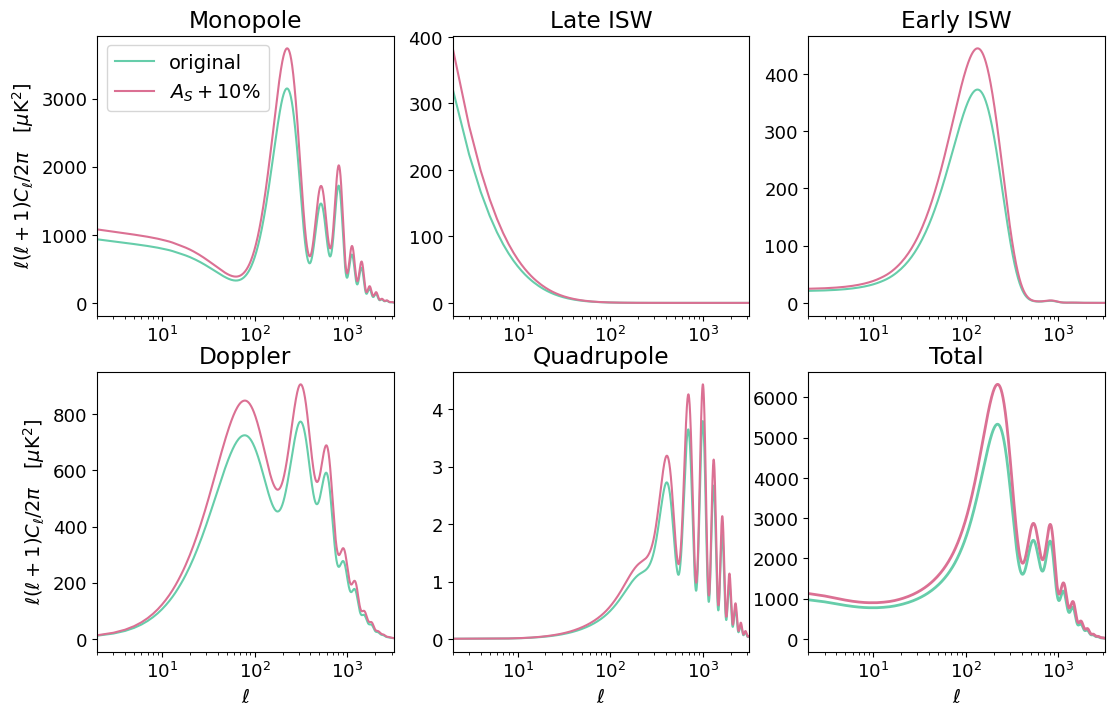

In [104]:
pars_ = pars.copy()
pars_.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561)
pars_.InitPower.set_params(As=2.105e-9*1.1, ns=0.9665)
results_As = camb.get_results(pars_)
powers_As = results_As.get_cmb_power_spectra(pars_, CMB_unit='muK')
totCL_As = powers['total']
ell_As = np.arange(totCL_As.shape[0])

monopole_source_As, ISW_As, doppler_As, quadrupole_source_As = get_scalar_temperature_sources()

early_ISW_As = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))
late_ISW_As = ISW_As - early_ISW_As

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_.set_custom_scalar_sources([monopole_source_As, ISW_As, early_ISW_As, late_ISW_As ,doppler_As ,quadrupole_source_As], 
        source_names =names)

data_As = camb.get_results(pars_)
dic_As = data_As.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

ls =np.arange(dic_As['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='mediumaquamarine', label='original')
plt.semilogx(ls,dic_As['monxmon'], color='palevioletred', label='$A_S + 10\%$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
plt.legend()
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['LISWxLISW'], color='palevioletred')
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['eISWxeISW'], color='palevioletred')
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='mediumaquamarine')
plt.semilogx(ls,dic_As['dopxdop'],color='palevioletred')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['QxQ'], color='palevioletred')
plt.xlabel('$\ell$')
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='mediumaquamarine')
plt.semilogx(ls,dic_As['TxT'], lw=2, color='palevioletred')
plt.title('Total')
plt.xlabel('$\ell$')
plt.xlim(2, ls[-1])

**Observations:**
- there is a proportional increase in the amplitude of the monopole component for $A_s + 10\%$ compared to the original $A_s$, this may be because $A_S$ affects the initial amplitude of primordial density perturbations, which are responsible for seeding temperature fluctuations in the CMB;

- the late ISW presents increased amplitude, particularly at smaller angular scales ($\ell$), this is probably because an increase in $A_S$ intensifies the growth of density perturbations, leading to stronger gravitational potentials over time.

### $n_s$

(2, 3150)

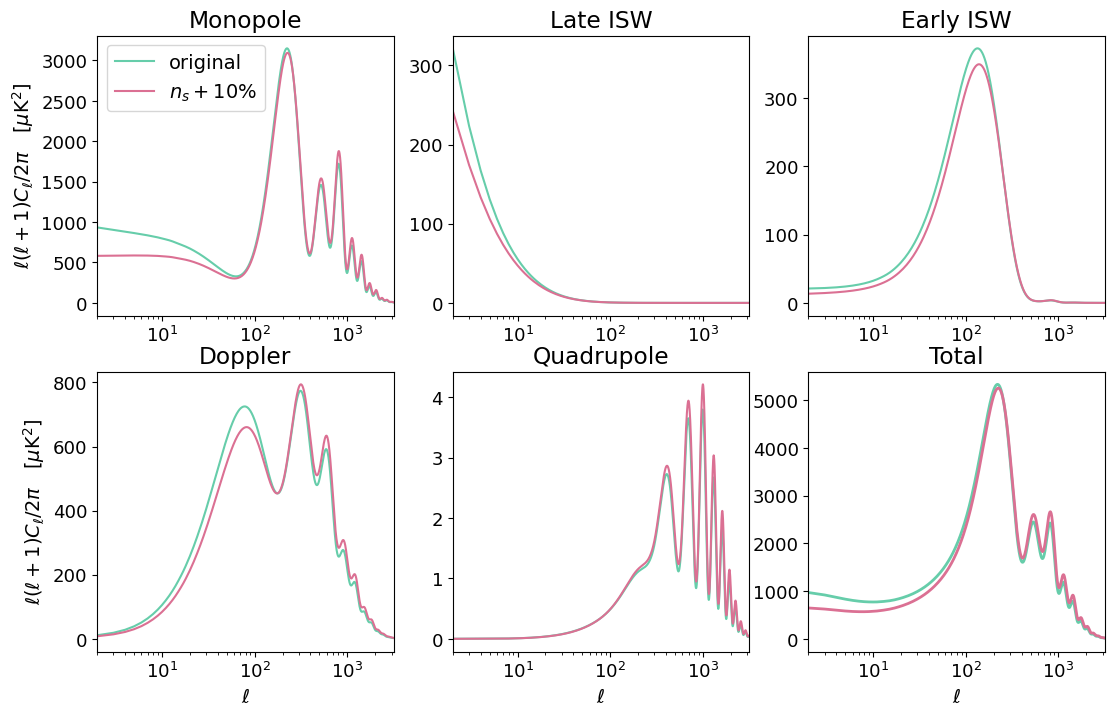

In [105]:
pars_ = pars.copy()
pars_.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561)
pars_.InitPower.set_params(As=2.105e-9, ns=0.9665*1.1)
results_As = camb.get_results(pars_)
powers_As = results_As.get_cmb_power_spectra(pars_, CMB_unit='muK')
totCL_As = powers['total']
ell_As = np.arange(totCL_As.shape[0])

monopole_source_As, ISW_As, doppler_As, quadrupole_source_As = get_scalar_temperature_sources()

early_ISW_As = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))
late_ISW_As = ISW_As - early_ISW_As

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_.set_custom_scalar_sources([monopole_source_As, ISW_As, early_ISW_As, late_ISW_As ,doppler_As ,quadrupole_source_As], 
        source_names =names)

data_As = camb.get_results(pars_)
dic_As = data_As.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

ls =np.arange(dic_As['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='mediumaquamarine', label='original')
plt.semilogx(ls,dic_As['monxmon'], color='palevioletred', label='$n_s + 10\%$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
plt.legend()
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['LISWxLISW'], color='palevioletred')
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['eISWxeISW'], color='palevioletred')
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='mediumaquamarine')
plt.semilogx(ls,dic_As['dopxdop'],color='palevioletred')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['QxQ'], color='palevioletred')
plt.xlabel('$\ell$')
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='mediumaquamarine')
plt.semilogx(ls,dic_As['TxT'], lw=2, color='palevioletred')
plt.title('Total')
plt.xlabel('$\ell$')
plt.xlim(2, ls[-1])

**Observations:**
- a decrease in $n_s$ (which corresponds to increasing power at smaller scales) may have led to an increase in the monopole amplitude at those scales;

- $n_s$ affects the growth of large-scale structures and the late ISW effect similarly to $A_S$.

### $\tau$

(2, 3150)

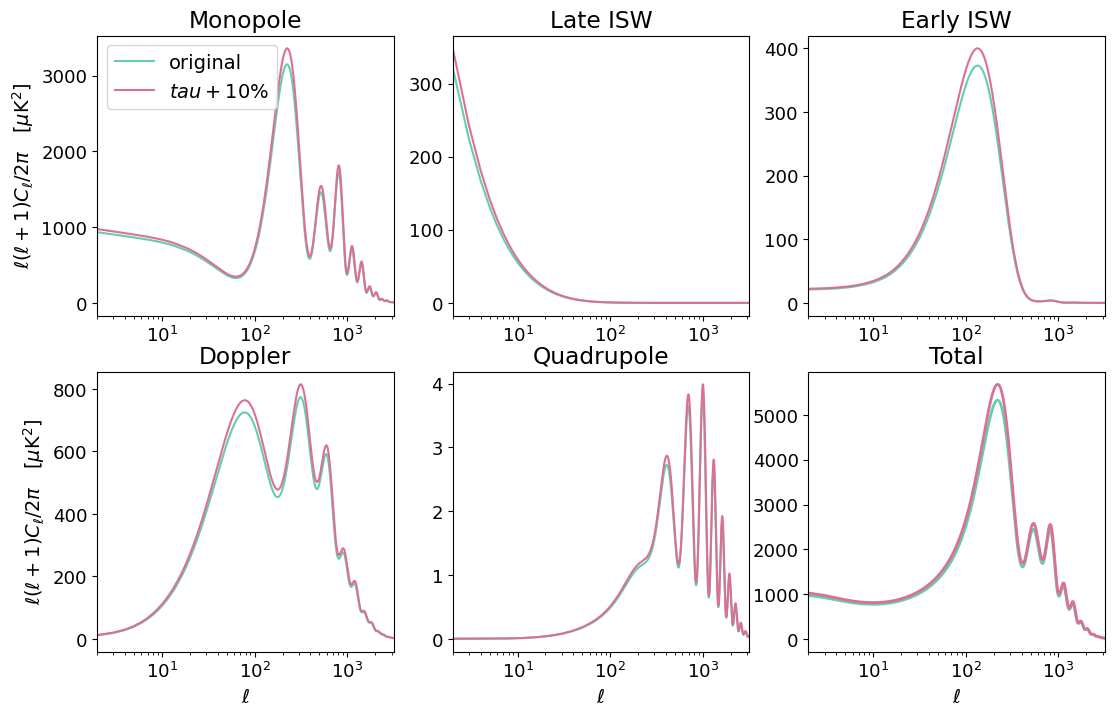

In [117]:
pars_ = pars.copy()
pars_.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561*1.1)
pars_.InitPower.set_params(As=2.105e-9, ns=0.9665)
results_As = camb.get_results(pars_)
powers_As = results_As.get_cmb_power_spectra(pars_, CMB_unit='muK')
totCL_As = powers['total']
ell_As = np.arange(totCL_As.shape[0])

monopole_source_As, ISW_As, doppler_As, quadrupole_source_As = get_scalar_temperature_sources()

early_ISW_As = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))
late_ISW_As = ISW_As - early_ISW_As

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_.set_custom_scalar_sources([monopole_source_As, ISW_As, early_ISW_As, late_ISW_As ,doppler_As ,quadrupole_source_As], 
        source_names =names)

data_As = camb.get_results(pars_)
dic_As = data_As.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

ls =np.arange(dic_As['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='mediumaquamarine', label='original')
plt.semilogx(ls,dic_As['monxmon'], color='palevioletred', label='$ tau + 10\%$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
plt.legend()
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['LISWxLISW'], color='palevioletred')
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['eISWxeISW'], color='palevioletred')
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='mediumaquamarine')
plt.semilogx(ls,dic_As['dopxdop'],color='palevioletred')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['QxQ'], color='palevioletred')
plt.xlabel('$\ell$')
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='mediumaquamarine')
plt.semilogx(ls,dic_As['TxT'], lw=2, color='palevioletred')
plt.title('Total')
plt.xlabel('$\ell$')
plt.xlim(2, ls[-1])

### $H_0$

(2, 3150)

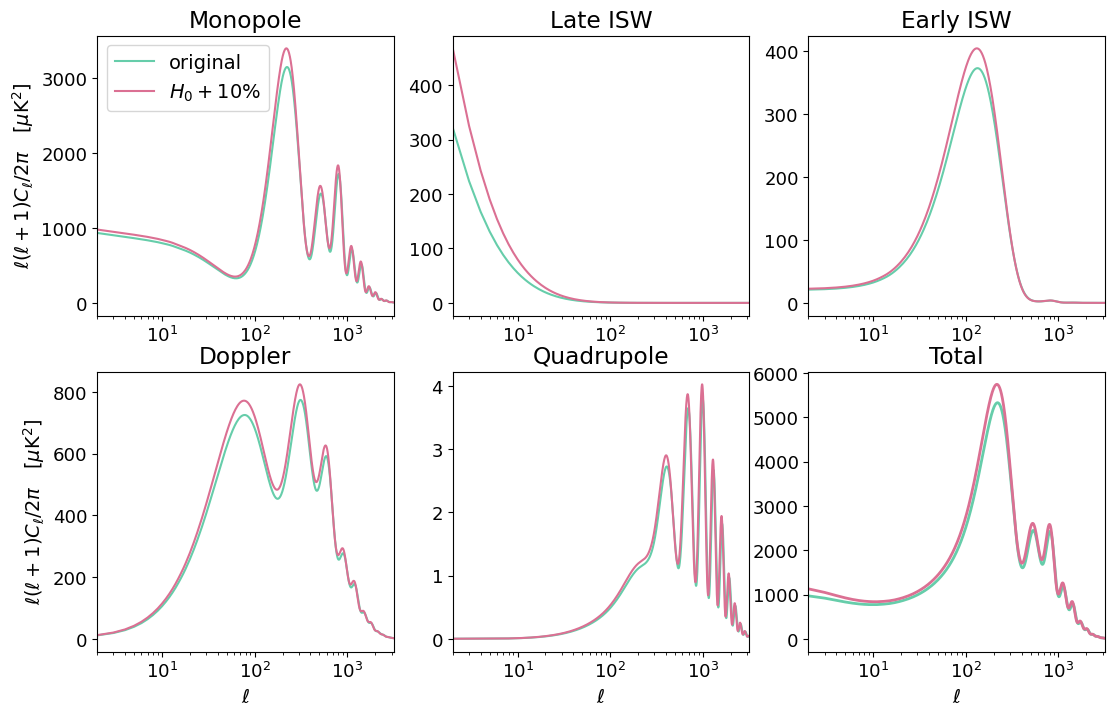

In [107]:
pars_ = pars.copy()
pars_.set_cosmology(H0=67.66*1.1, ombh2=0.02242, omch2=0.11933, tau=0.0561)
pars_.InitPower.set_params(As=2.105e-9, ns=0.9665)
results_As = camb.get_results(pars_)
powers_As = results_As.get_cmb_power_spectra(pars_, CMB_unit='muK')
totCL_As = powers['total']
ell_As = np.arange(totCL_As.shape[0])

monopole_source_As, ISW_As, doppler_As, quadrupole_source_As = get_scalar_temperature_sources()

early_ISW_As = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))
late_ISW_As = ISW_As - early_ISW_As

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_.set_custom_scalar_sources([monopole_source_As, ISW_As, early_ISW_As, late_ISW_As ,doppler_As ,quadrupole_source_As], 
        source_names =names)

data_As = camb.get_results(pars_)
dic_As = data_As.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

ls =np.arange(dic_As['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='mediumaquamarine', label='original')
plt.semilogx(ls,dic_As['monxmon'], color='palevioletred', label='$H_0 + 10\%$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
plt.legend()
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['LISWxLISW'], color='palevioletred')
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['eISWxeISW'], color='palevioletred')
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='mediumaquamarine')
plt.semilogx(ls,dic_As['dopxdop'],color='palevioletred')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['QxQ'], color='palevioletred')
plt.xlabel('$\ell$')
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='mediumaquamarine')
plt.semilogx(ls,dic_As['TxT'], lw=2, color='palevioletred')
plt.title('Total')
plt.xlabel('$\ell$')
plt.xlim(2, ls[-1])

**Observations:**
- increasing $H_0$ by $10\%$ generally affects the expansion rate of the universe, which influences the angular scale of the observed CMB fluctuations ($\rightarrow \ $ slight increase of the amplitude of the monopole component);

- increasing $H_0$ affects the growth rate of structures and can alter the gravitational potentials that the CMB photons encounter.

### $\Omega_b h^2$

(2, 3150)

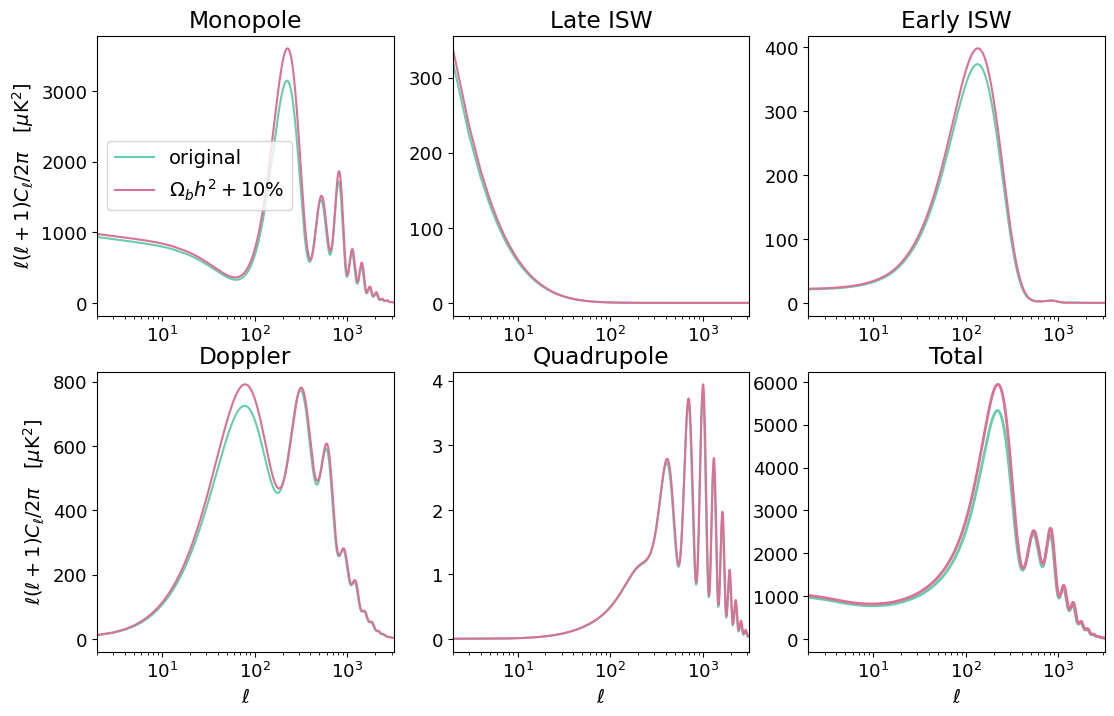

In [108]:
pars_ = pars.copy()
pars_.set_cosmology(H0=67.66, ombh2=0.02242*1.1, omch2=0.11933, tau=0.0561)
pars_.InitPower.set_params(As=2.105e-9, ns=0.9665)
results_As = camb.get_results(pars_)
powers_As = results_As.get_cmb_power_spectra(pars_, CMB_unit='muK')
totCL_As = powers['total']
ell_As = np.arange(totCL_As.shape[0])

monopole_source_As, ISW_As, doppler_As, quadrupole_source_As = get_scalar_temperature_sources()

early_ISW_As = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))
late_ISW_As = ISW_As - early_ISW_As

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_.set_custom_scalar_sources([monopole_source_As, ISW_As, early_ISW_As, late_ISW_As ,doppler_As ,quadrupole_source_As], 
        source_names =names)

data_As = camb.get_results(pars_)
dic_As = data_As.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

ls =np.arange(dic_As['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='mediumaquamarine', label='original')
plt.semilogx(ls,dic_As['monxmon'], color='palevioletred', label='$\Omega_b h^2 + 10\%$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
plt.legend()
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['LISWxLISW'], color='palevioletred')
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['eISWxeISW'], color='palevioletred')
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='mediumaquamarine')
plt.semilogx(ls,dic_As['dopxdop'],color='palevioletred')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['QxQ'], color='palevioletred')
plt.xlabel('$\ell$')
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='mediumaquamarine')
plt.semilogx(ls,dic_As['TxT'], lw=2, color='palevioletred')
plt.title('Total')
plt.xlabel('$\ell$')
plt.xlim(2, ls[-1])

**Observations:**
- the main difference is the slight increase in the amplitude of the monopole.

### $\Omega_c h^2$

(2, 3150)

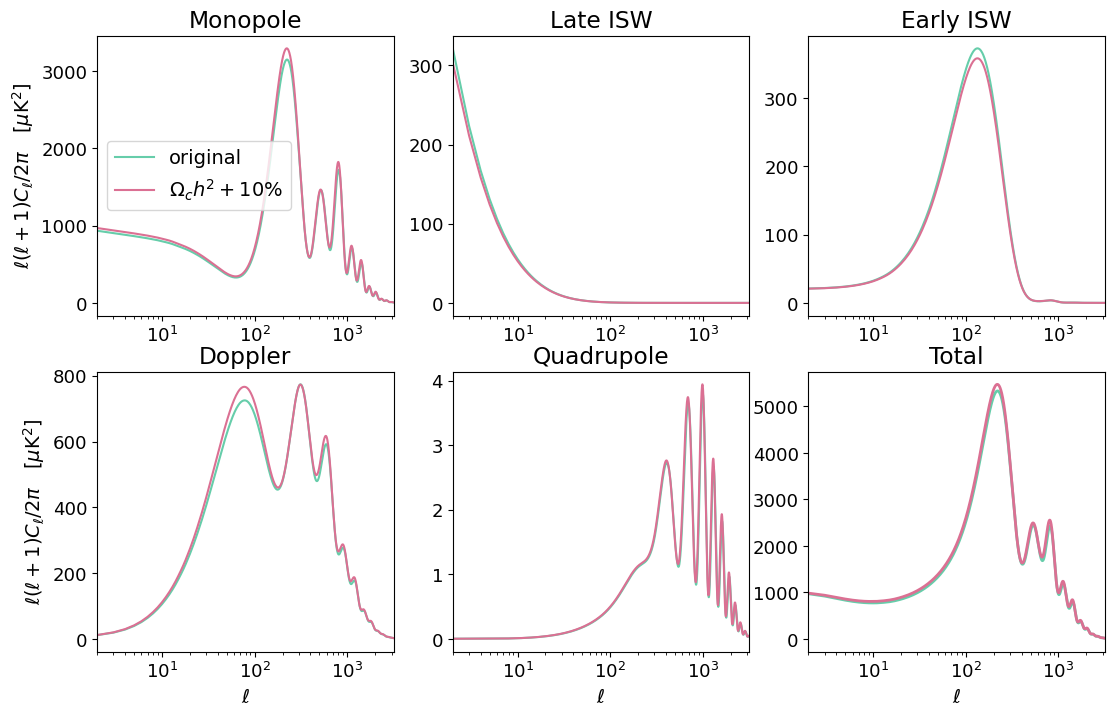

In [109]:
pars_ = pars.copy()
pars_.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933*1.1, tau=0.0561)
pars_.InitPower.set_params(As=2.105e-9, ns=0.9665)
results_As = camb.get_results(pars_)
powers_As = results_As.get_cmb_power_spectra(pars_, CMB_unit='muK')
totCL_As = powers['total']
ell_As = np.arange(totCL_As.shape[0])

monopole_source_As, ISW_As, doppler_As, quadrupole_source_As = get_scalar_temperature_sources()

early_ISW_As = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))
late_ISW_As = ISW_As - early_ISW_As

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_.set_custom_scalar_sources([monopole_source_As, ISW_As, early_ISW_As, late_ISW_As ,doppler_As ,quadrupole_source_As], 
        source_names =names)

data_As = camb.get_results(pars_)
dic_As = data_As.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

ls =np.arange(dic_As['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='mediumaquamarine', label='original')
plt.semilogx(ls,dic_As['monxmon'], color='palevioletred', label='$\Omega_c h^2 + 10\%$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
plt.legend()
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['LISWxLISW'], color='palevioletred')
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['eISWxeISW'], color='palevioletred')
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='mediumaquamarine')
plt.semilogx(ls,dic_As['dopxdop'],color='palevioletred')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='mediumaquamarine')
plt.semilogx(ls,dic_As['QxQ'], color='palevioletred')
plt.xlabel('$\ell$')
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='mediumaquamarine')
plt.semilogx(ls,dic_As['TxT'], lw=2, color='palevioletred')
plt.title('Total')
plt.xlabel('$\ell$')
plt.xlim(2, ls[-1])